# imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras

# First Generate the Sample dataset from given equation y = 5x^3-8x^2-7x+1

In [ ]:
# take x values randomly in the range -20 to 20
x = np.random.randint(-20,20,10000)
y = 5*x*x*x -8*x*x - 7*x +1

# Normalize, split the dataset into test,train and validation set

In [ ]:
#Normalize
x_min = np.min(x)
x_max = np.max(x)
x_data = (2 * (x - x_min) / (x_max - x_min)) - 1

y_min = np.min(y)
y_max = np.max(y)
y_data = (2 * (y - y_min) / (y_max - y_min)) - 1

#length of dataset
length = len(x)
#split data
x_train,y_train = x_data[:int(length*.90)], y_data[:int(length*.90)]
x_validation ,y_validation =  x_data[int(length*.90):int(length*.95)], y_data[int(length*.90):int(length*.95)]
x_test, y_test = x_data[int(length*.95):], y_data[int(length*.95):]

# Build the required DNN  Model

In [ ]:
inputs = Input((1,))
h1 = Dense(32, name = "First_Hidden_Layer", activation = "relu")(inputs)
h2 = Dense(64, name = "Second_Hidden_Layer", activation = "relu")(h1)
h3 = Dense(128, name = "Third_Hidden_Layer", activation = "relu")(h2)
outputs = Dense(1,name = "Output_Layer")(h3)
model = Model(inputs,outputs,name = "DNN_Model")
model.summary()



Model: "DNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 First_Hidden_Layer (Dense)  (None, 32)                64        
                                                                 
 Second_Hidden_Layer (Dense  (None, 64)                2112      
 )                                                               
                                                                 
 Third_Hidden_Layer (Dense)  (None, 128)               8320      
                                                                 
 Output_Layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

# Train The model with train set of data

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.R2Score(name='accuracy')])
trained_model = model.fit(x_train,y_train,epochs=10,validation_data=(x_validation, y_validation))
history=trained_model.history

Epoch 1/10
282/282 [==============================] - 3s 6ms/step - loss: 0.0113 - accuracy: 0.9334 - val_loss: 2.0283e-04 - val_accuracy: 0.9988
Epoch 2/10
282/282 [==============================] - 1s 4ms/step - loss: 8.0503e-05 - accuracy: 0.9995 - val_loss: 4.1606e-05 - val_accuracy: 0.9997
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 1.7821e-05 - accuracy: 0.9999 - val_loss: 2.0436e-05 - val_accuracy: 0.9999
Epoch 4/10
282/282 [==============================] - 1s 4ms/step - loss: 1.4208e-05 - accuracy: 0.9999 - val_loss: 5.7149e-06 - val_accuracy: 1.0000
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 7.0106e-06 - accuracy: 1.0000 - val_loss: 1.8003e-06 - val_accuracy: 1.0000
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 6.0669e-06 - accuracy: 1.0000 - val_loss: 3.0724e-06 - val_accuracy: 1.0000
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 1.6332e-05 - accuracy: 0.9999 

# Statistics

16/16 [==============================] - 0s 2ms/step - loss: 1.3365e-06 - accuracy: 1.0000
Test Loss: 0.0000013
Test Accuracy: 99.99925%
16/16 [==============================] - 0s 2ms/step


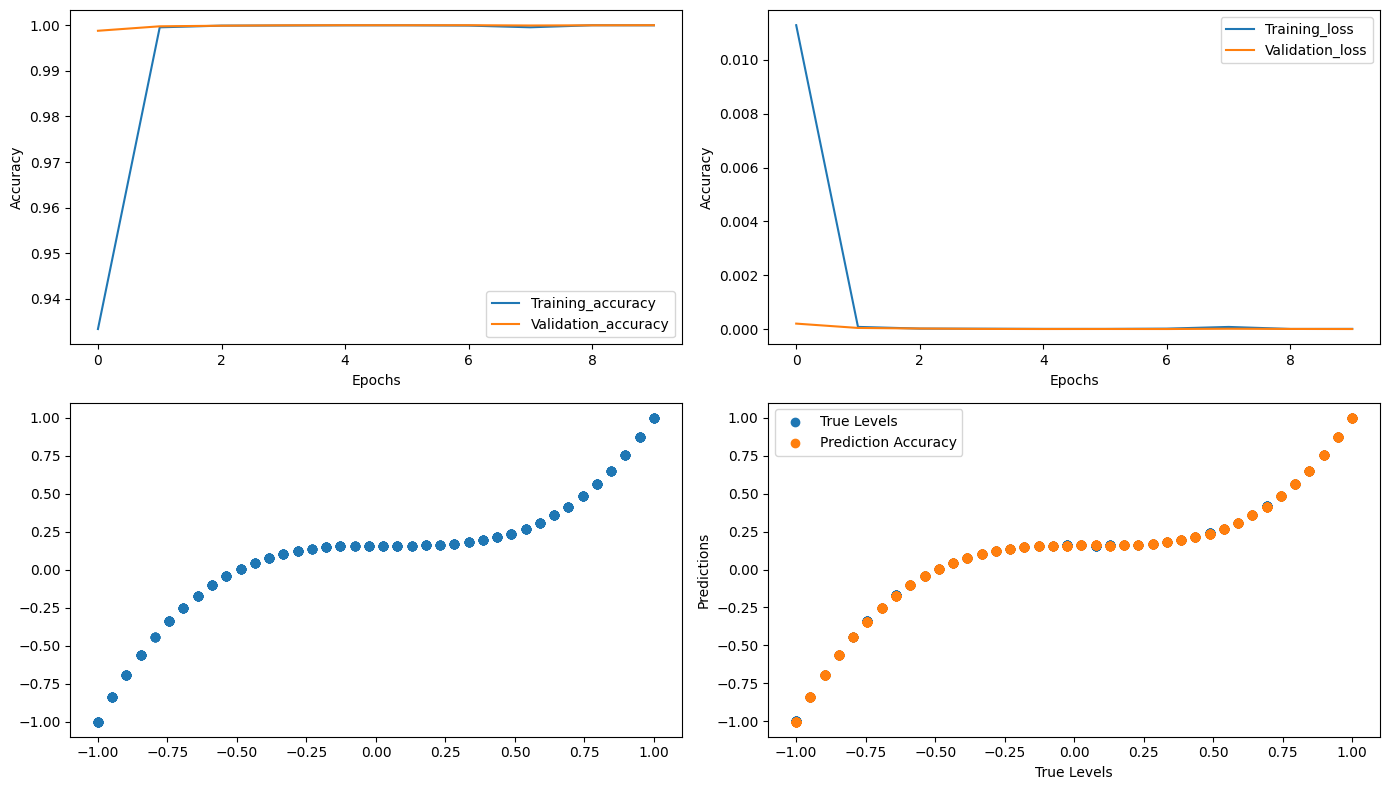

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_accuracy', 'Validation_accuracy'])
# Plot Training and Validation Loss
plt.subplot(2,2,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_loss', 'Validation_loss'])
# plot
plt.subplot(2,2,3)
plt.scatter(x_test,y_test)
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.5f}%")
# Predict on test data
predictions = model.predict(x_test)
# Plot prediction accuracy vs true levels
plt.subplot(2,2,4)
plt.scatter(x_test,y_test)
plt.scatter(x_test, predictions)
plt.ylabel('Predictions')
plt.xlabel('True Levels')
plt.legend(['True Levels','Prediction Accuracy'])
plt.tight_layout()
plt.show()